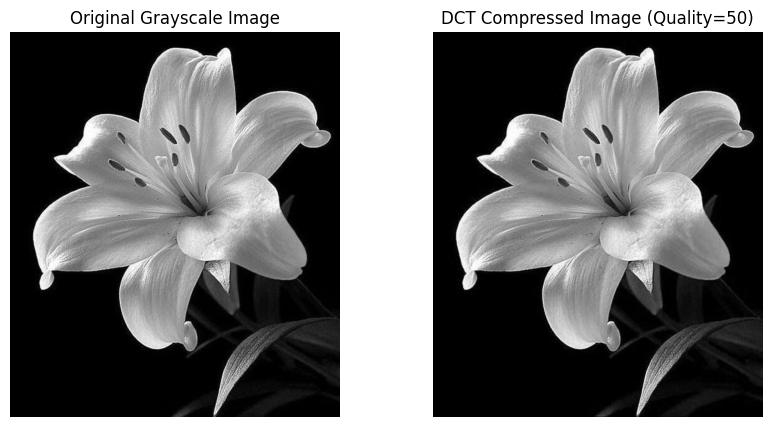

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dct_compression(image, quality=50):

    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Define an 8x8 Quantization Matrix (JPEG standard)
    Q50 = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                    [12, 12, 14, 19, 26, 58, 60, 55],
                    [14, 13, 16, 24, 40, 57, 69, 56],
                    [14, 17, 22, 29, 51, 87, 80, 62],
                    [18, 22, 37, 56, 68, 109, 103, 77],
                    [24, 35, 55, 64, 81, 104, 113, 92],
                    [49, 64, 78, 87, 103, 121, 120, 101],
                    [72, 92, 95, 98, 112, 100, 103, 99]])

    # Scale the quantization matrix based on quality
    if quality < 50:
        scale = 50 / quality
    else:
        scale = 2 - (quality / 50)

    Q = np.clip(Q50 * scale, 1, 255)  # Scale and ensure values are within range

    # Step 3: Process image in 8x8 blocks
    h, w = gray.shape
    compressed = np.zeros((h, w), dtype=np.float32)

    for i in range(0, h, 8):
        for j in range(0, w, 8):
            block = gray[i:i+8, j:j+8]  # Extract 8x8 block

            # Pad the block if it's smaller than 8x8
            block_h, block_w = block.shape
            if block_h < 8 or block_w < 8:
                padded_block = np.zeros((8, 8), dtype=np.float32)
                padded_block[:block_h, :block_w] = block
                block = padded_block

            dct_block = cv2.dct(np.float32(block))  # Apply DCT
            quantized_block = np.round(dct_block / Q)  # Quantization step

            # Store the compressed values in the compressed matrix, taking care of any padding done earlier
            if block_h < 8 or block_w < 8:
               compressed[i:i+block_h, j:j+block_w] = quantized_block[:block_h, :block_w]
            else:
               compressed[i:i+8, j:j+8] = quantized_block  # Store compressed values


    # Step 4: Apply Inverse DCT to reconstruct the image
    reconstructed = np.zeros((h, w), dtype=np.float32)

    for i in range(0, h, 8):
        for j in range(0, w, 8):

            # Get the block from the compressed matrix, ensuring to handle any potential padding
            quantized_block = compressed[i:i+8, j:j+8]

            # Pad the block if it's smaller than 8x8 for the IDCT
            block_h, block_w = quantized_block.shape
            if block_h < 8 or block_w < 8:
                padded_block = np.zeros((8, 8), dtype=np.float32)
                padded_block[:block_h, :block_w] = quantized_block
                quantized_block = padded_block

            dequantized_block = quantized_block * Q  # Dequantization
            idct_block = cv2.idct(dequantized_block)  # Apply inverse DCT

            # Store the reconstructed values, taking care of any padding
            if block_h < 8 or block_w < 8:
               reconstructed[i:i+block_h, j:j+block_w] = idct_block[:block_h, :block_w]
            else:
               reconstructed[i:i+8, j:j+8] = idct_block  # Store reconstructed values


    # Normalize and convert to uint8
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)

    return gray, reconstructed  # Return original and compressed image

# Load an image
image = cv2.imread("image.jpeg")

# Apply DCT compression
original, compressed = dct_compression(image, quality=50)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed, cmap='gray')
plt.title("DCT Compressed Image (Quality=50)")
plt.axis('off')

plt.show()

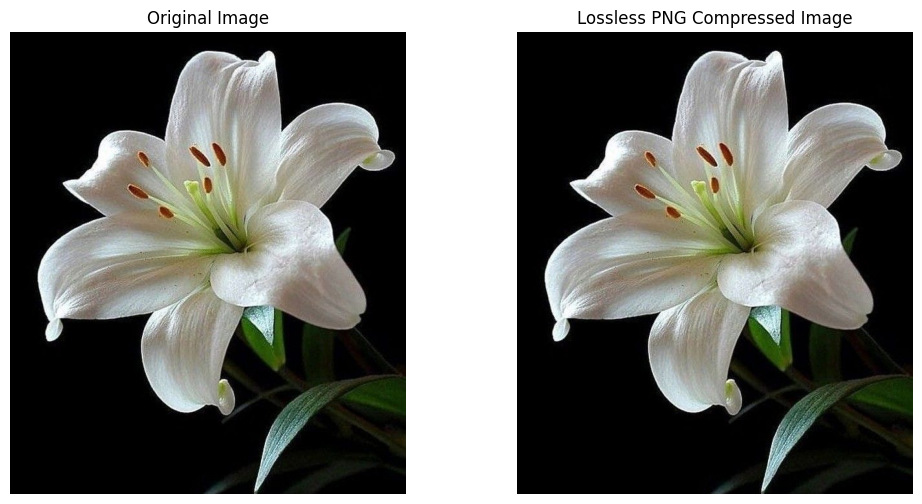

'compressed_lossless.png'

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def lossless_png_compression(image_path):

    # Load image
    image = cv2.imread(image_path)

    # Save as PNG (lossless)
    compressed_path = "compressed_lossless.png"
    cv2.imwrite(compressed_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])

    # Load and display
    original = Image.open(image_path)
    compressed = Image.open(compressed_path)

    # Show results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(compressed)
    axes[1].set_title("Lossless PNG Compressed Image")
    axes[1].axis("off")

    plt.show()

    return compressed_path  # Return compressed file path

# Example usage
lossless_png_compression("image.jpeg")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


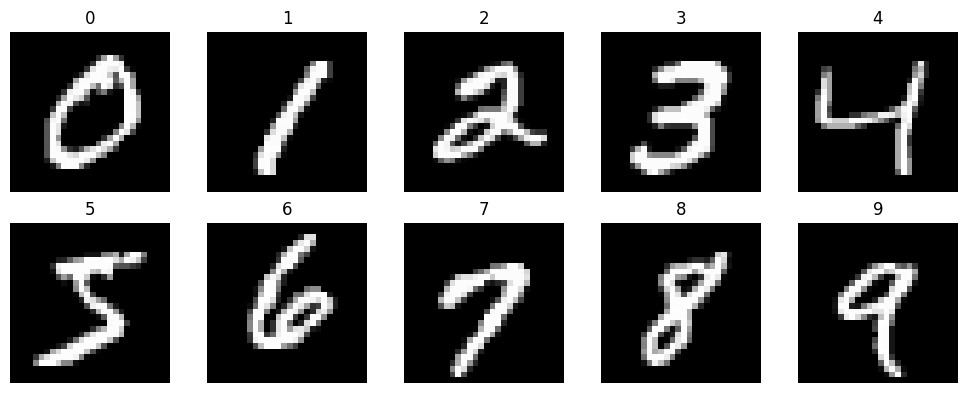

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)




Epoch 1/50
188/188 - 10s - 53ms/step - accuracy: 0.8765 - loss: 1.3089 - val_accuracy: 0.9632 - val_loss: 0.1244
Epoch 2/50
188/188 - 2s - 9ms/step - accuracy: 0.9755 - loss: 0.0807 - val_accuracy: 0.9769 - val_loss: 0.0738
Epoch 3/50
188/188 - 2s - 9ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9808 - val_loss: 0.0660
Epoch 4/50
188/188 - 3s - 14ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9808 - val_loss: 0.0687
Epoch 5/50
188/188 - 1s - 7ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 0.9840 - val_loss: 0.0587
Epoch 6/50
188/188 - 1s - 7ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9840 - val_loss: 0.0599
Epoch 7/50
188/188 - 1s - 8ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9850 - val_loss: 0.0603
Epoch 8/50
188/188 - 3s - 14ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9846 - val_loss: 0.0627
Epoch 9/50
188/188 - 1s - 7ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9846 - val_loss: 0

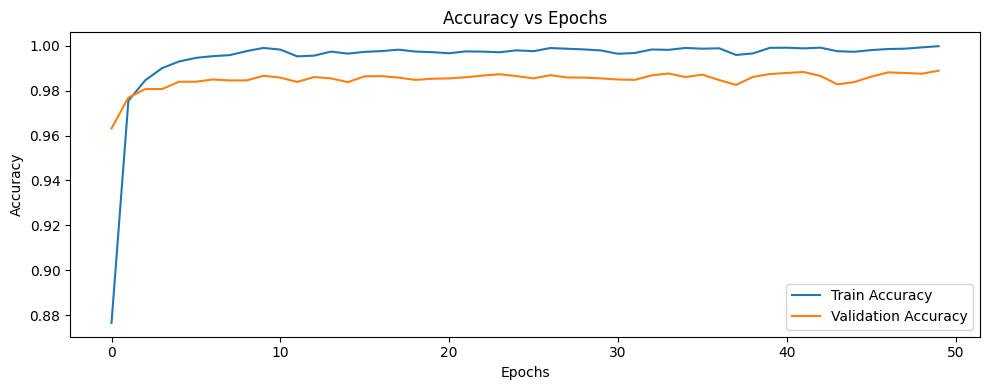




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Accuracy,Precision,Recall,F-Measure,ROC AUC
0,98.91,98.91,98.91,98.91,99.99


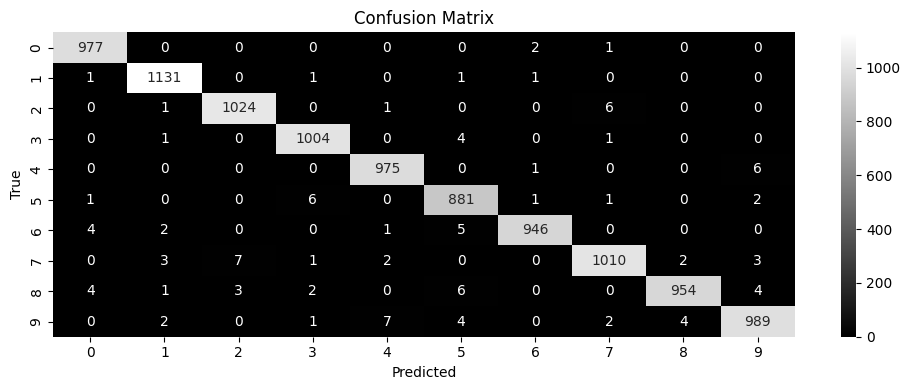

In [ ]:
import numpy as np
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def display_sample_images(x_train, y_train, dataset='mnist'):
    class_names = {
        'mnist': [str(i) for i in range(10)],
        'cifar10': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    }

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()
    for i in range(10):
        if dataset == 'mnist':
            axes[i].imshow(x_train[y_train == i][0], cmap='gray')
        elif dataset == 'cifar10':
            axes[i].imshow(x_train[np.where(y_train == i)[0][0]])
        axes[i].set_title(class_names[dataset][i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_and_evaluate_cnn(dataset='mnist'):
    if dataset == 'mnist':
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
        input_shape = (28, 28, 1)
    elif dataset == 'cifar10':
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
        input_shape = (32, 32, 3)

    display_sample_images(x_train, y_train, dataset=dataset)
    model = create_cnn_model(input_shape)
    print('\n\n')
    model.summary()
    print('\n\n')

    # Train the model
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=256, verbose=2)
    print('\n\n')

    # Plot accuracy vs epoch graph
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print('\n\n')

    # Evaluate the model
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = y_test.flatten()

    # Metrics
    accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f_measure = f1_score(y_true, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

    metrics = {
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F-Measure': [f_measure],
        'ROC AUC': [roc_auc]
    }

    df_metrics = pd.DataFrame(metrics)
    df_metrics *= 100
    display(df_metrics.round(2))
    print('\n\n')

    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(10, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gist_yarg_r')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Use the function for MNIST dataset
train_and_evaluate_cnn(dataset='mnist')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


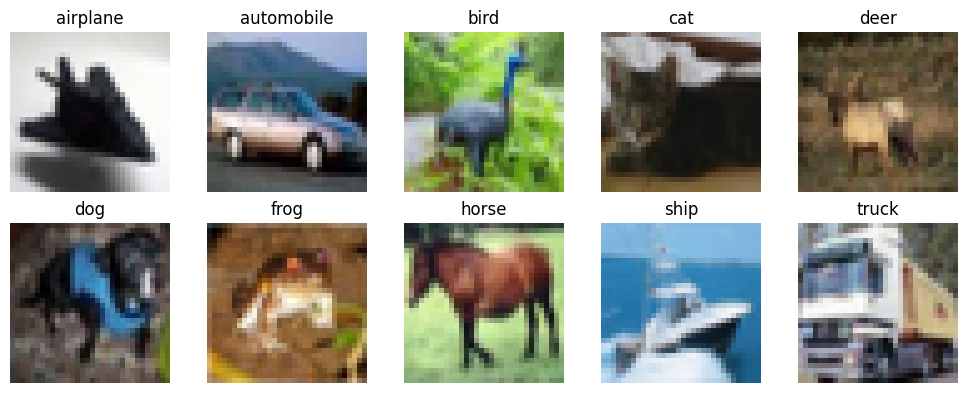

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)




Epoch 1/50
157/157 - 7s - 46ms/step - accuracy: 0.3984 - loss: 1.6768 - val_accuracy: 0.4708 - val_loss: 1.4847
Epoch 2/50
157/157 - 6s - 37ms/step - accuracy: 0.5357 - loss: 1.3071 - val_accuracy: 0.5623 - val_loss: 1.2593
Epoch 3/50
157/157 - 3s - 17ms/step - accuracy: 0.5919 - loss: 1.1571 - val_accuracy: 0.5936 - val_loss: 1.1581
Epoch 4/50
157/157 - 2s - 14ms/step - accuracy: 0.6244 - loss: 1.0785 - val_accuracy: 0.6187 - val_loss: 1.0922
Epoch 5/50
157/157 - 3s - 16ms/step - accuracy: 0.6544 - loss: 0.9946 - val_accuracy: 0.6522 - val_loss: 1.0180
Epoch 6/50
157/157 - 3s - 17ms/step - accuracy: 0.6783 - loss: 0.9282 - val_accuracy: 0.6591 - val_loss: 1.0082
Epoch 7/50
157/157 - 1s - 10ms/step - accuracy: 0.6949 - loss: 0.8793 - val_accuracy: 0.6760 - val_loss: 0.9510
Epoch 8/50
157/157 - 3s - 17ms/step - accuracy: 0.7100 - loss: 0.8328 - val_accuracy: 0.6633 - val_loss: 0.9746
Epoch 9/50
157/157 - 1s - 9ms/step - accuracy: 0.7246 - loss: 0.7989 - val_accuracy: 0.6757 - val_los

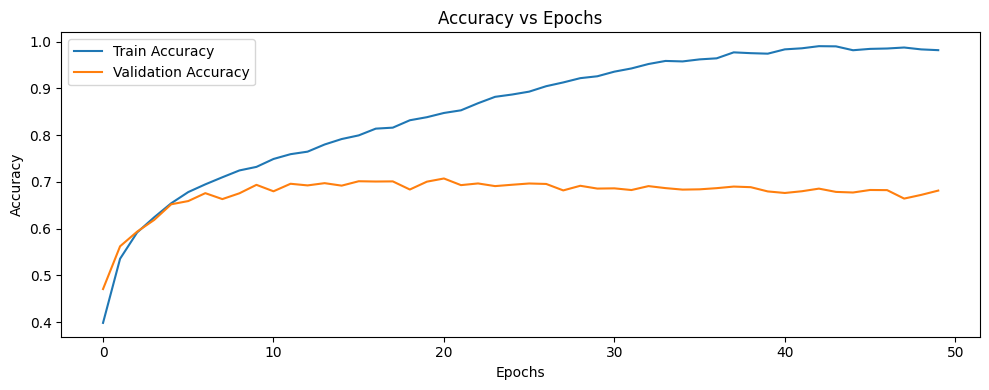




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Precision,Recall,F-Measure,ROC AUC
0,67.52,67.9,67.52,67.53,94.37


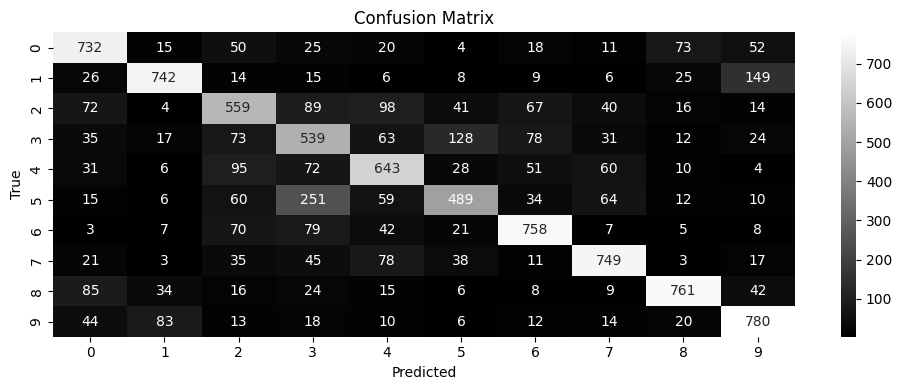

In [ ]:
train_and_evaluate_cnn(dataset='cifar10')